<a href="https://colab.research.google.com/github/devanshi14malhotra/ML_Model_Classification_of_Iris_Species/blob/main/ML_Techneeds_Iris_Classification_Devanshi_Charushi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IRIS DATASET CLASSIFICATION USING MACHINE LEARNING**
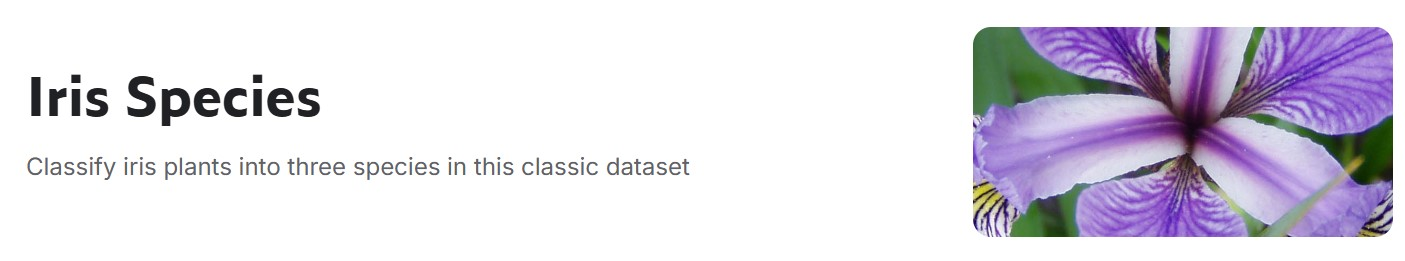

This project aims to classify iris flowers into three species—Setosa, Versicolour, and Virginica—based on attributes like their sepal and petal measurements. Using machine learning models like Logistic Regression, Decision Tree, and K-Nearest Neighbors (KNN), we analyze the dataset, train models, and compare their performance to determine which classifier is the most accurate.



---



---



---



1. Importing Necessary Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

2. Loading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload() # Upload CSV file manually

Saving Iris.csv to Iris.csv


In [ ]:
cd = pd.read_csv("Iris.csv") #Read CSV into a pandas DataFrame

3. Understanding the Dataset

In [ ]:
print("Dataset shape:", cd.shape)

Dataset shape: (150, 6)


In [ ]:
print("Column names:", cd.columns.tolist())

Column names: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [ ]:
print(cd.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


In [ ]:
print(cd.drop(columns=['Id'], errors="ignore"))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]


In [ ]:
print(cd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB
None


In [ ]:
print("Unique species:", cd["Species"].unique())

Unique species: [0 1 2]


4. Checking for Missing Values (Data Preprocessing)

In [ ]:
print(cd.isnull().sum())  # Counts missing values in each column

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


5. Exploratory Data Analysis (EDA)

In [ ]:
# Summary Statistics
cd.describe()

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Class Distribution
print(cd["Species"].value_counts())  # Count each species

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

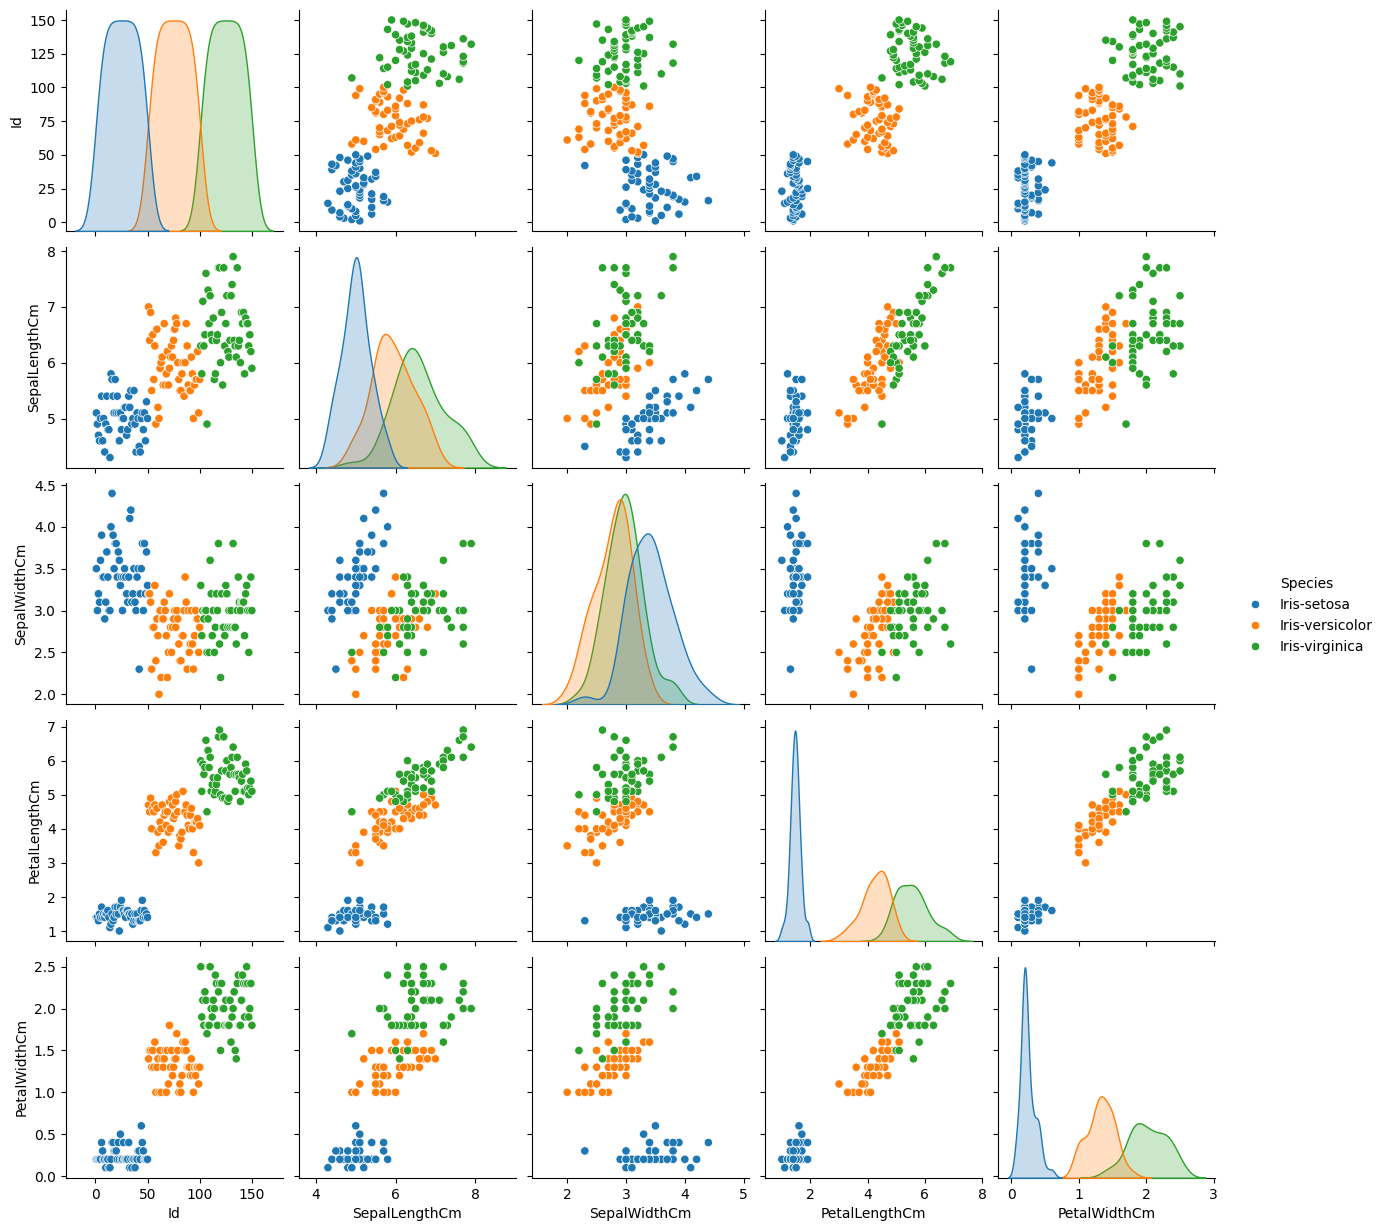

In [ ]:
sns.pairplot(cd, hue="Species")
plt.show

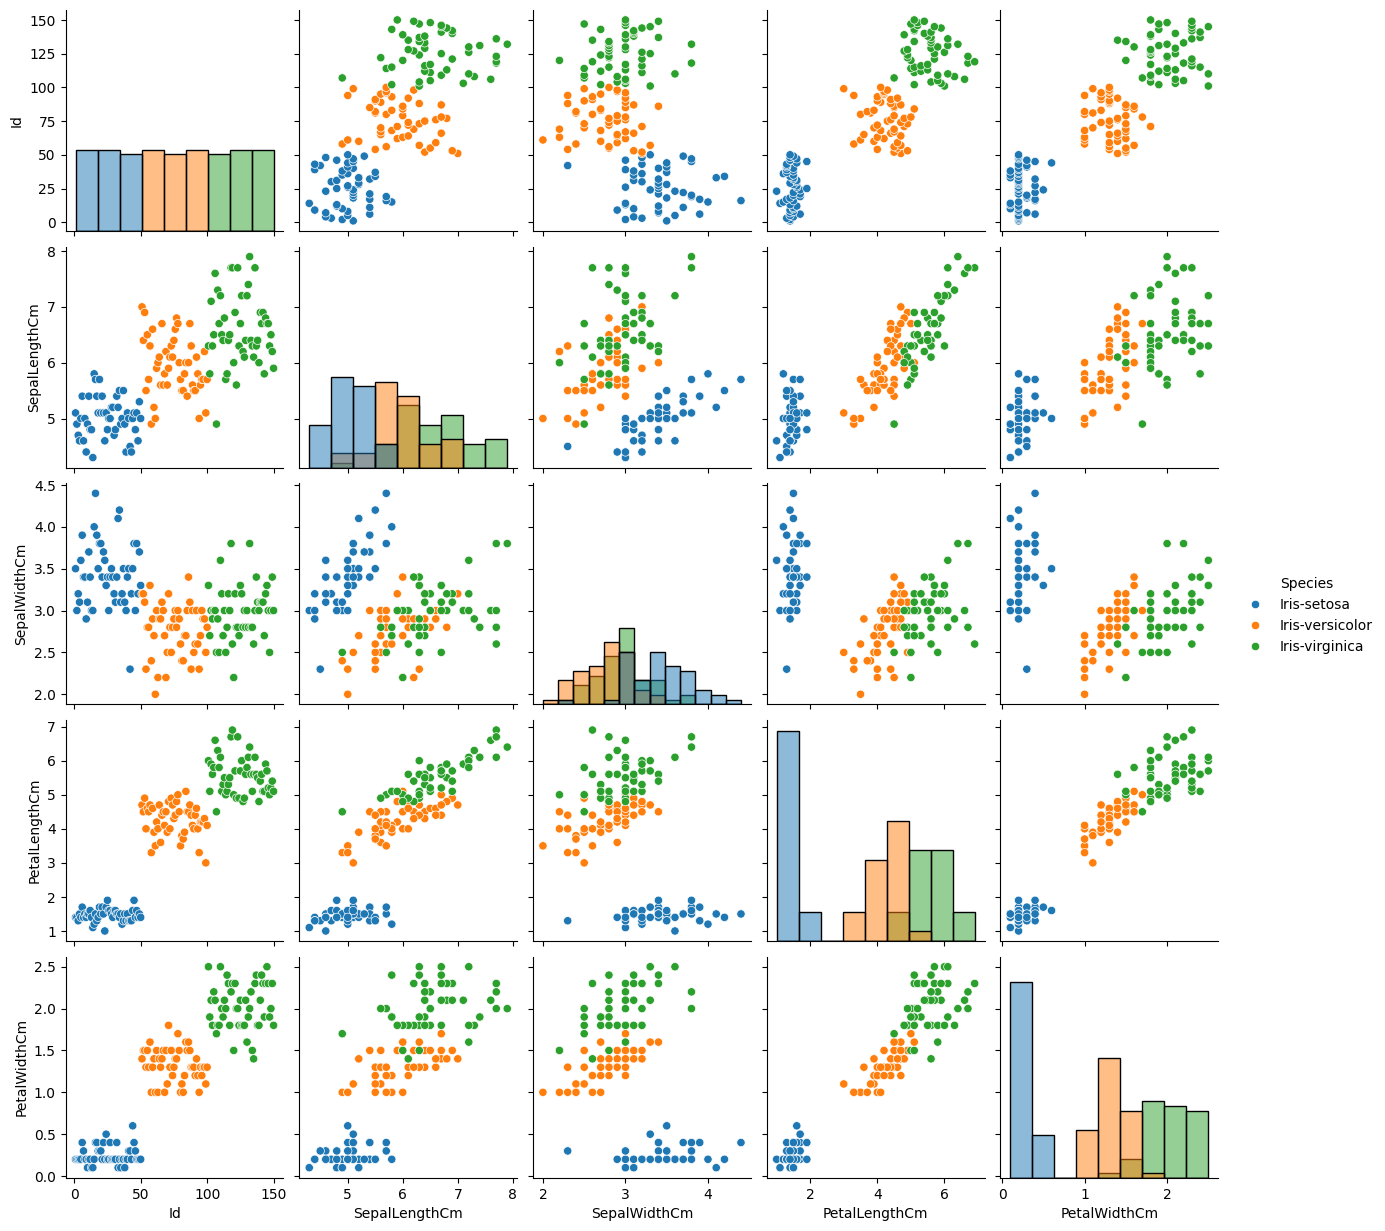

In [ ]:
sns.pairplot(cd, hue="Species", diag_kind="hist")
plt.show()

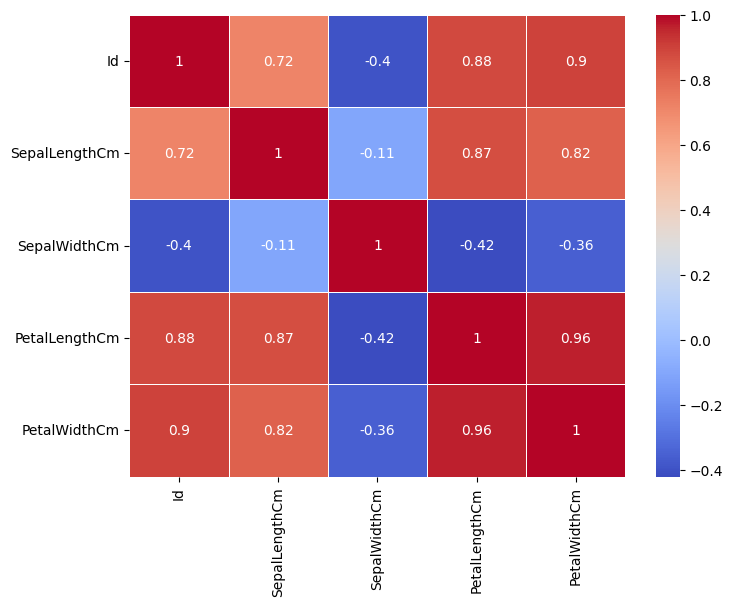

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
cd_numeric = cd.select_dtypes(include=['number'])
sns.heatmap(cd_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

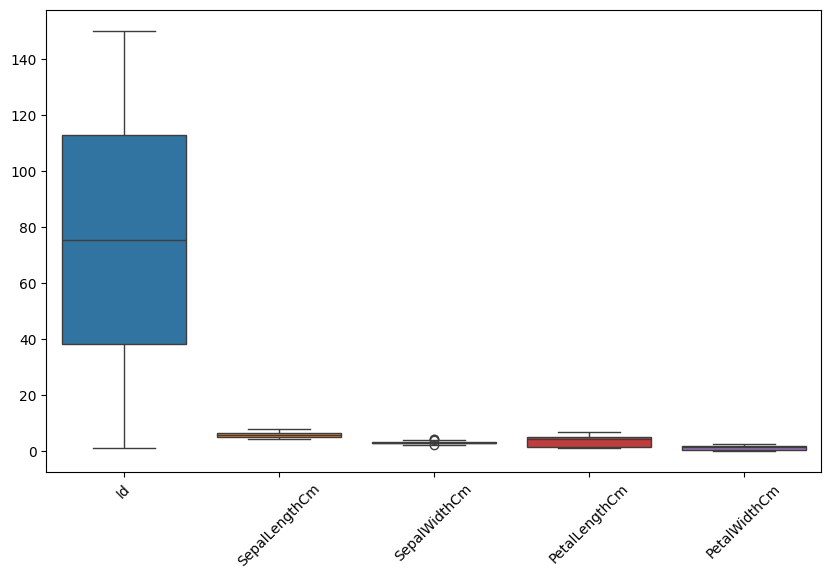

In [ ]:
# Boxplot for Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=cd.iloc[:, :-1])
plt.xticks(rotation=45)
plt.show()

5. Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert Species into Numbers (Label Encoding)
encoder = LabelEncoder()
cd["Species"] = encoder.fit_transform(cd["Species"])
print(cd.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


In [ ]:
# Splitting Data for Training & Testing
from sklearn.model_selection import train_test_split
X = cd.drop('Species', axis = 1)
y = cd['Species']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)

(45, 5)
(105,)
(105, 5)
(45,)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

7. Training Logistic Regression Model

In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)
prediction_lr = log.predict(X_test)
print(prediction_lr)
accuracy = accuracy_score(y_test, prediction_lr)
print(accuracy)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
1.0


8. Training Decision Tree Model

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
prediction_dt = dt_model.predict(X_test)
print(prediction_dt)
accuracy = accuracy_score(y_test, prediction_dt)
print(accuracy)

[2 1 0 2 0 1 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
0.9777777777777777


9. Training KNN Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
prediction_knn = knn.predict(X_test)
print(prediction_knn)
print(np.mean(y_test == prediction_knn))

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
1.0


10. Comparing Model Performance

In [ ]:
print("Logistic Regression:", classification_report(y_test, prediction_lr))
print("Decision Tree:", classification_report(y_test, prediction_dt))
print("KNN:", classification_report(y_test, prediction_knn))

Logistic Regression:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Decision Tree:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      1.00      0.97        18
           2       1.00      0.91      0.95        11

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

KNN:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00 